# Exploratory Data Analysis<a id='Exploratory_Data_Analysis'></a>

## Introduction<a id='Introduction'></a>
Explore the data relationships of all the features and understand how the features compare to the response variable.

## Imports<a id='Imports'></a>

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

#from library.sb_utils import save_file

## Load The Data<a id='Load_The_Data'></a>

In [22]:
data = pd.read_csv("../data/raw/Ecommerce_Sales_Prediction_Dataset.csv")
print(data.info())
unique = [data[col].nunique() for col in data.columns]  
print("total unique values in each column:",unique)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB
None
total unique values in each column: [1000, 5, 992, 907, 3, 1000, 42]


In [24]:
print(data.head())

         Date Product_Category   Price  Discount Customer_Segment  \
0  01-01-2023           Sports  932.80     35.82       Occasional   
1  02-01-2023             Toys  569.48      3.60          Premium   
2  03-01-2023       Home Decor  699.68      3.56          Premium   
3  04-01-2023             Toys  923.27      0.61          Premium   
4  05-01-2023             Toys  710.17     47.83          Premium   

   Marketing_Spend  Units_Sold  
0          6780.38          32  
1          6807.56          16  
2          3793.91          27  
3          9422.75          29  
4          1756.83          17  


In [26]:
# Convert to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Product_Category  1000 non-null   object        
 2   Price             1000 non-null   float64       
 3   Discount          1000 non-null   float64       
 4   Customer_Segment  1000 non-null   object        
 5   Marketing_Spend   1000 non-null   float64       
 6   Units_Sold        1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 54.8+ KB


In [28]:
print(data.describe(include=['object', 'category']))
print(data.describe(include=['float', 'int']))

       Product_Category Customer_Segment
count              1000             1000
unique                5                3
top         Electronics          Regular
freq                210              345
             Price     Discount  Marketing_Spend   Units_Sold
count  1000.000000  1000.000000      1000.000000  1000.000000
mean    505.241920    24.919750      4912.830240    29.631000
std     289.791248    14.439951      2840.602656     7.267989
min      14.590000     0.010000       100.300000     5.000000
25%     243.342500    12.995000      2413.020000    24.000000
50%     509.310000    24.965000      4837.245000    30.000000
75%     747.592500    37.562500      7319.675000    34.000000
max     999.420000    49.920000      9995.620000    57.000000


## Explore The Data<a id='Explore_The_Data'></a>

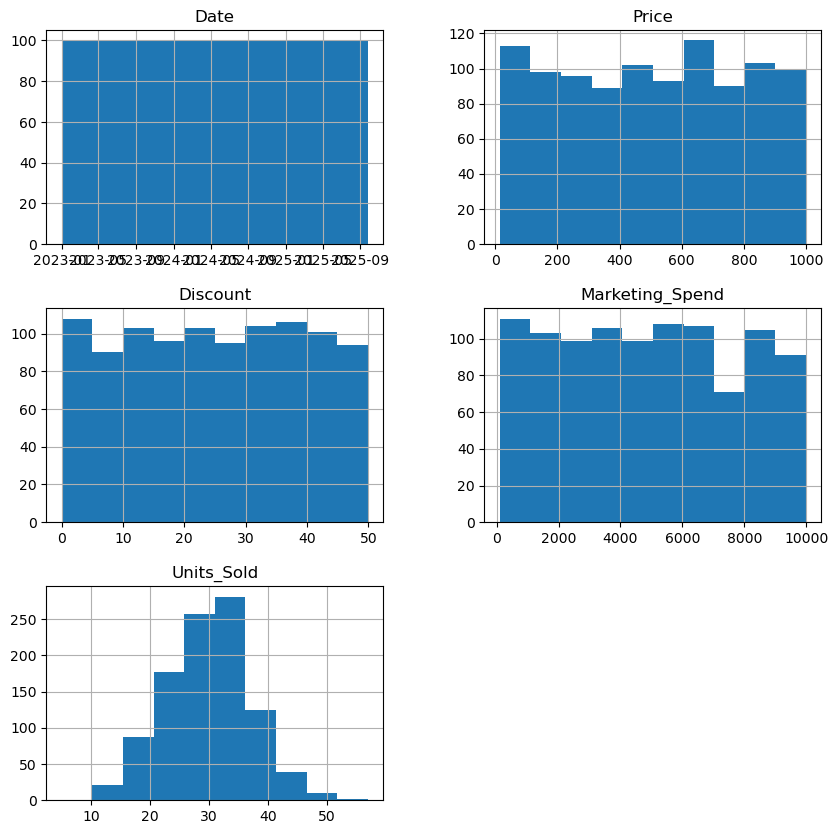

In [31]:
#histograms for each variable in df
hist = data.hist(bins=10,figsize =(10,10))

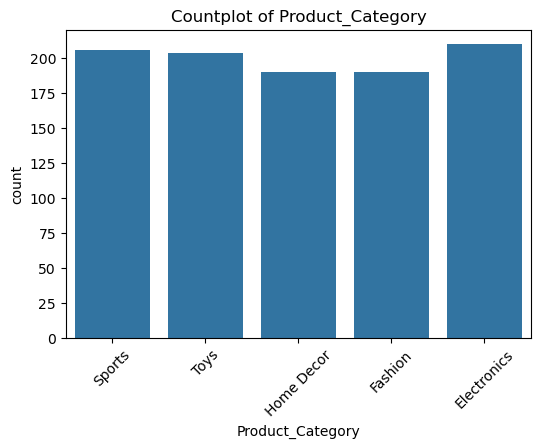

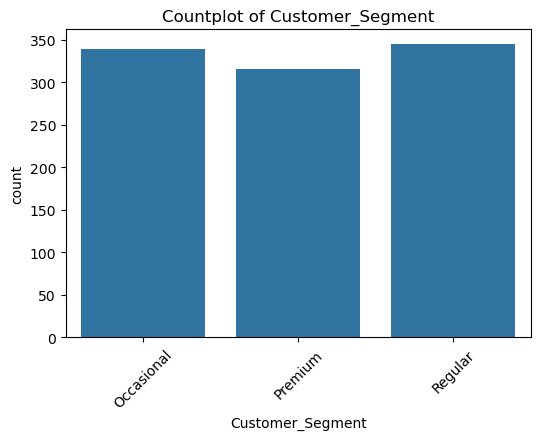

In [32]:
categorical_cols = data.select_dtypes(include="object").columns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=data)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()


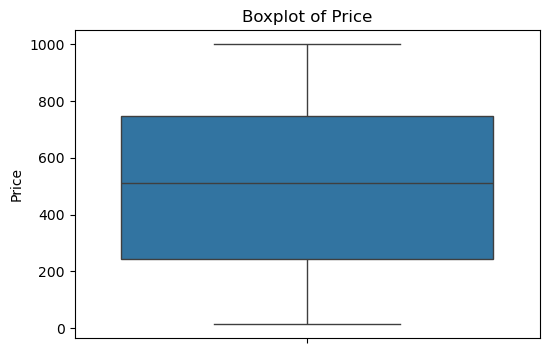

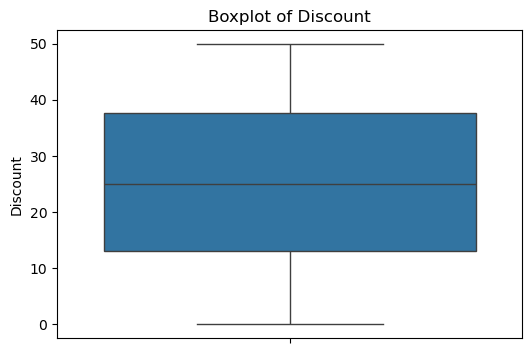

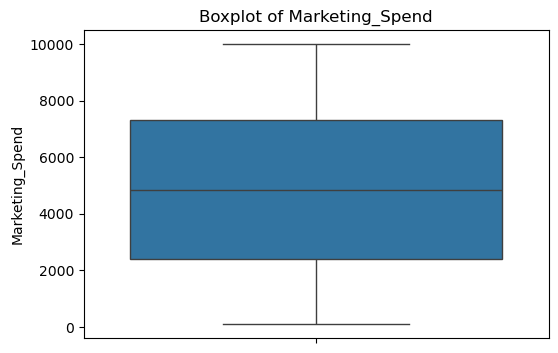

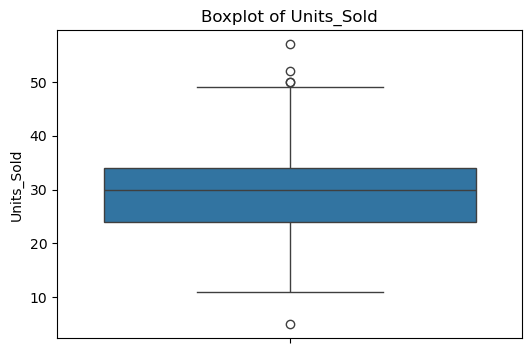

In [35]:
#create a boxplot for every column in data
numeric_cols = data.select_dtypes(include="number").columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

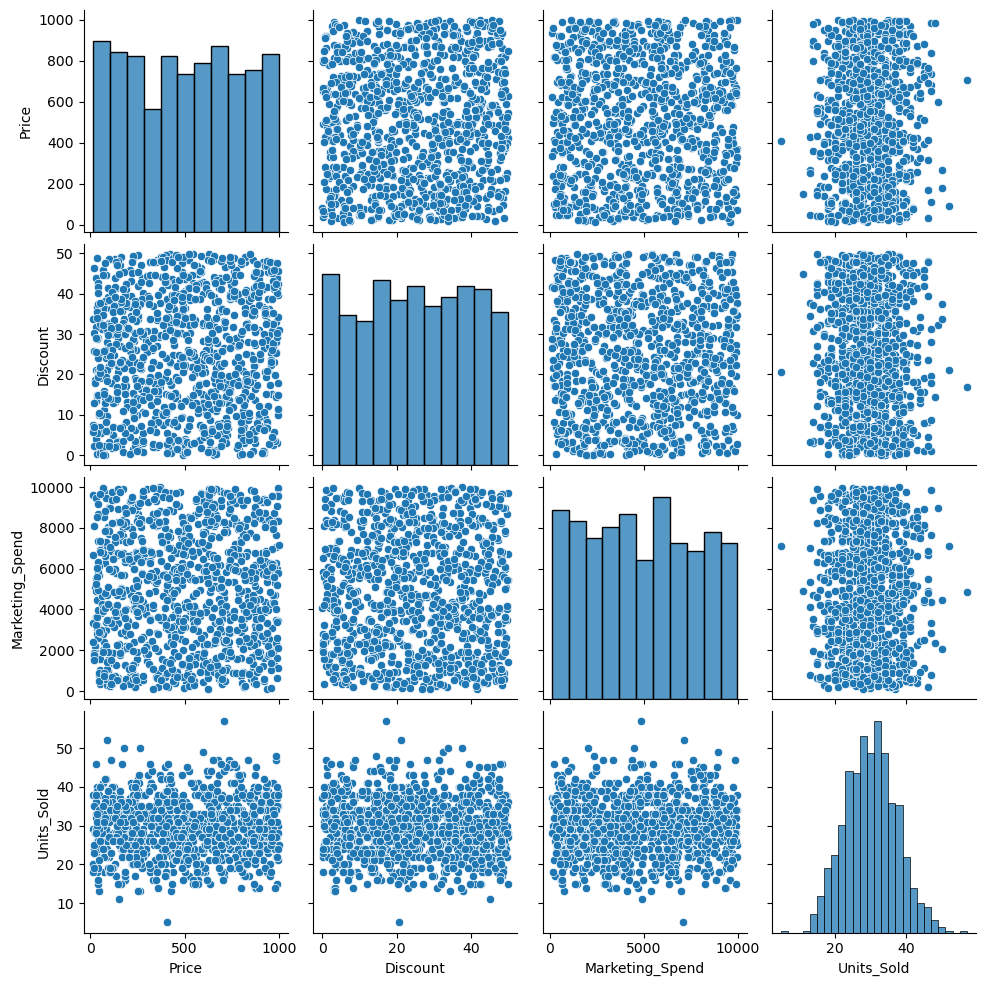

In [37]:
#pair plots
g = sns.pairplot(data)


## Summary<a id='Summary'></a>

With all the histograms and scatterplots drawn,their do not seem to be any noticeable relationships between the features.